In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly
import plotly.express as px

# 1. Análisis exploratorio
## 1.1 Integridad de la información

In [3]:
winesW= pd.read_csv(r"C:\Users\Usuario\Ciencia de datos\MLPython\python-ml-course-master\datasets\wine\winequality-white.csv", sep=";")
winesR= pd.read_csv(r"C:\Users\Usuario\Ciencia de datos\MLPython\python-ml-course-master\datasets\wine\winequality-red.csv", sep=";")

In [4]:
print(winesR.columns)
print(winesW.columns)
print(len(winesR))
print(len(winesW))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
1599
4898


Como se puede observar, ambos data sets tienen las mismas columnas, se procederá a unir los dos datasets

In [5]:
wines= pd.concat([winesR, winesW], ignore_index= True)

In [6]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


Como primer paso realizo un análisis programático de losd atos, en este caso, teniendo presente que todas las columnas corresponden a caracteristicas de la composición química de un vino en particular, es de esperarse que las variables sean de tipo flotante, es decir, números decimales.

Como la variable "quality" es la correspondiente a la calificación asignada por un catador de vinos, tiene sentido que esta esté dada por números enteros


In [7]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Como se puede observar, las columnas del dataset no presentan valores nulos, por esto, no hay que aplicar ningún tratamiento de datos

In [8]:
## Exploración visual de los primeros 50 datos para comprobar la integridad de la información
wines.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [9]:
## Exploración visual de los últimos 50 datos para comprobar la integridad de la información
wines.tail(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6447,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
6448,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
6451,6.2,0.230,0.38,1.60,0.044,12.0,113.0,0.99176,3.30,0.73,11.400000,5
6452,5.2,0.250,0.23,1.40,0.047,20.0,77.0,0.99001,3.32,0.62,11.400000,5
6453,6.2,0.350,0.29,3.90,0.041,22.0,79.0,0.99005,3.10,0.59,12.066667,6
6454,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6
6456,7.5,0.380,0.33,9.20,0.043,19.0,116.0,0.99444,3.08,0.42,11.400000,6


Con la finalidad de comprender con mejor profundidad nuestro problema, es importante entender que tan balanceada esta la muestra, en este caso nuestra clasificación es la supervivencia (columna "quality"), la cual puede tomar solamente valores enteros comprendidos, en este caso entre 3 y 9

In [10]:
wines.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Se puede observar que las categorías no están balanceadas, teniendo en cuenta esto, se decidirá si balancear por medio de algún método de muestreo el dataset dependiendo del resultado de la primera iteración del modelo

## 1.2 Entendimiento del sistema

En este caso particular, las variables de estudio no son temporales, represnetan en su totalidad mediciones de las propiedades químicas de una cantidad de vinos de diferentes fuentes, al mismo tiempo la calificación otorgada por un experto .
El conocimiento del origen de la información y su significado nos ayuda a encaminar de manera adecuada el tratamiento de datos.

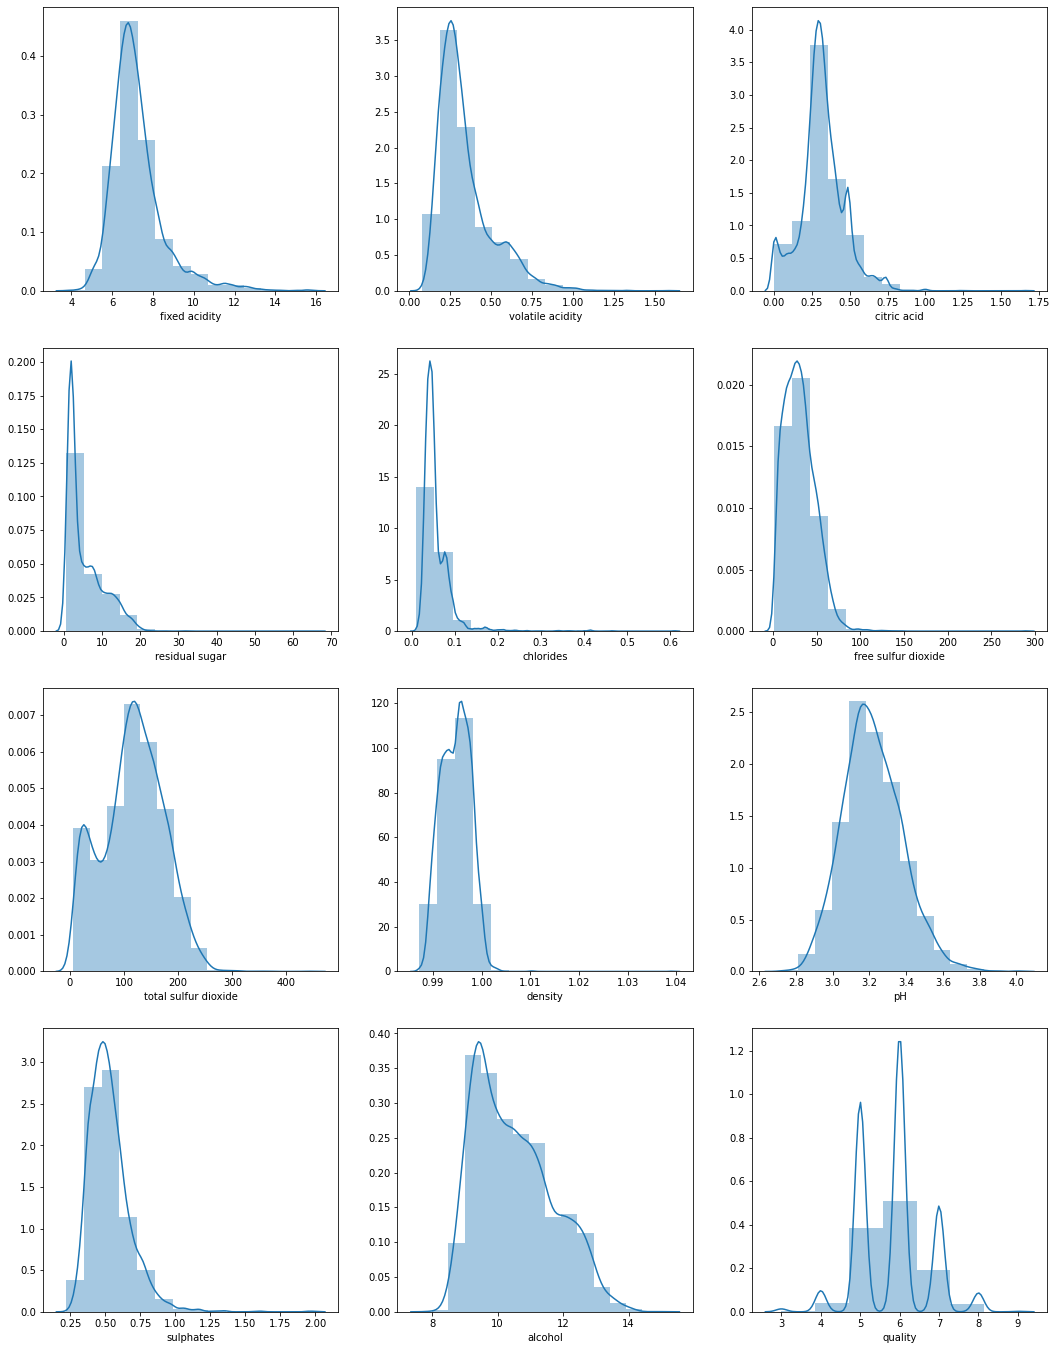

In [14]:
f, axes = plt.subplots(4, 3, figsize=(18, 24))
k=int(np.ceil(1+ np.log2(len(wines))))
sns.distplot(wines['fixed acidity'], bins= k, kde=True, ax= axes[0,0])
sns.distplot(wines['volatile acidity'], bins= k, kde=True, ax= axes[0,1])
sns.distplot(wines['citric acid'], bins= k, kde=True, ax= axes[0,2])
sns.distplot(wines['residual sugar'], bins= k, kde=True, ax= axes[1,0])
sns.distplot(wines['chlorides'], bins= k, kde=True, ax= axes[1,1])
sns.distplot(wines['free sulfur dioxide'], bins= k, kde=True, ax= axes[1,2])
sns.distplot(wines['total sulfur dioxide'], bins= k, kde=True, ax= axes[2,0])
sns.distplot(wines['density'], bins= k, kde=True, ax= axes[2,1])
sns.distplot(wines['pH'], bins= k, kde=True, ax= axes[2,2])
sns.distplot(wines['sulphates'], bins= k, kde=True, ax= axes[3,0])
sns.distplot(wines['alcohol'], bins= k, kde=True, ax= axes[3,1])
sns.distplot(wines['quality'], bins= 7, kde=True, ax= axes[3,2])


En las gráficas presentadas anteriormente se puede ver la distribución de los datos para cada una de las diferentes variables, en este caso, como los datos corresponden a caracteristicas químicas de cada una de las bebidas, en la medida que se avance en el entendimiento del sistema, se podrá observar con mayor claridad como influye cada una de estas sobre la variable objetivo "quality"


### Resumen diagnostico del data set:
* El contenido del dataset es de buena calidad, no tiene valores vacíos, tiene una buena cantidad de datos, aunque no son suficientes para un modelo de DL, podríamos intentar un modelo de ensamblaje en caso tal de no estar satisfechos con el desempeño del modelo.
* La variable objetivo no está balanceada, sin embargo, como se puede observar la distribución normal en la misma, las calificaciónes menos repetidas en el dataset deberían depender enteramente de los outliers o valores atípicos que se puedan evidenciar más adelante.
* Las distribuciones no tienen colas pesadas en su mayoría, sin embargo algunas de las variables tienen colas largas


# 2. Examinación estadistica
## 2.1 Descripción básica


In [12]:
#Descripción de las variables numericas
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Hechos para resaltar:
* La dispersión para las variables "volatile acidity", "citric acidity", "residual sugar", "chlorides", "free sulfur dioxide" y "total sulfur dioxide" la dispersión es considerable, entre un 40% y un 50% para las variables mencionadas, para las demás variables del dataset la dispersión es poca.
* El conteo de variables es homogeneo, no hay datos faltantes para ningúna de las variables.

## 2.2 Análisis gráfico

Para facilitar la interpretación del gráfico de estados, seleccionaré solamente las variables que están más correlacionadas con la variable de salida

Text(0.5, 1.0, 'Correlaciones')

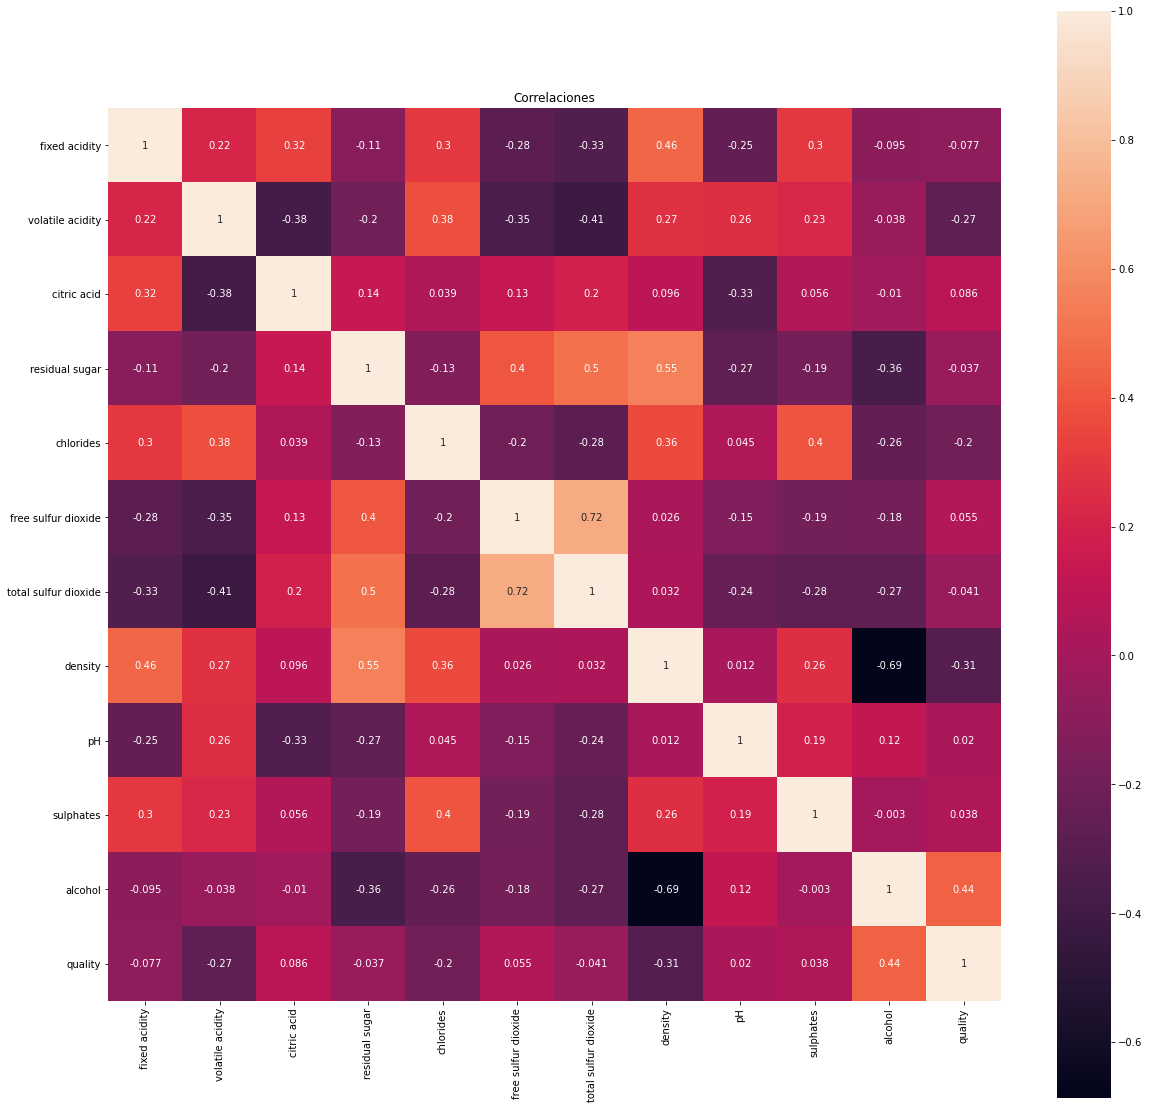

In [28]:
f, axes =plt.subplots(figsize=(20,20))
sns.heatmap(wines.corr(), square=True, annot=True).set_title('Correlaciones')

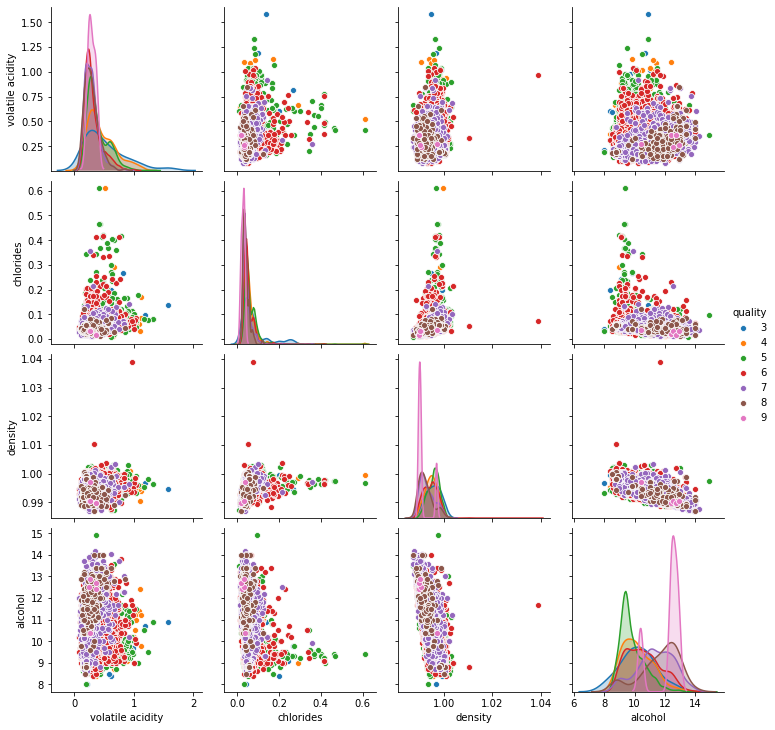

In [25]:
matters =["volatile acidity", "chlorides","density", "alcohol"]
sns.pairplot(data= wines,vars = matters, hue='quality')

In [27]:
sns.heatmap?

In [ ]:
]sns.heatmap